<a href="https://colab.research.google.com/github/Priyanka06081218/LLMs/blob/main/Adam_Vs_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

### Define the loss function

In [14]:
def quadratic_loss(x,y):
  return x**2 + 10 * y**2

### Gradient of the loss function

In [15]:
def quadratic_grad(x, y):
  dx=2*x
  dy=20*y
  return np.array([dx, dy])

### Gradient Descent (GD)

In [16]:
def gradient_descent(grad_func, lr, epochs, start_point):
  x,y = start_point
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]

  for _ in range(epochs):
    grad=grad_func(x,y)
    x-= lr*grad[0]
    y-= lr*grad[1]
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path), losses

###ADAM Optimizer

In [17]:
def adam_optimizer(grad_func, lr, beta1, beta2, epsilon, epochs, start_point):
  x, y = start_point
  m=np.array([0.0,0.0])
  v=np.array([0.0,0.0])
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]

  for t in range(1, epochs+1):
    grad=grad_func(x,y)

    #update biased first moment estimate
    m=beta1*m+(1-beta1)*grad

    #update biased secomd moment estimate
    v=beta2*v+(1-beta2)*(grad**2)

    #Bias correction
    m_hat=m/(1-beta1**t)
    v_hat=v/(1-beta2**t)

    #Update parameters
    x-=lr*m_hat[0]/(np.sqrt(v_hat[0])+epsilon)
    y-=lr*m_hat[0]/(np.sqrt(v_hat[1])+epsilon)

    path.append((x,y))
    losses.append(quadratic_loss(x,y))

  return np.array(path), losses

###Vizualization of paths

In [18]:
def plot_paths(function, paths, labels, title):
  X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
  Z=function(X, Y)

  plt.figure(figsize=(8,6))
  plt.contour(X, Y, Z, levels=50, cmap='jet')

  for path, label in zip(paths, labels):
    plt.plot(path[:, 0], path[:, 1], label=label)
    plt.scatter(path[0,0], path[0, 1], color='green', label='Start')
    plt.scatter(path[-1, 0], path[-1, 1], color='red', label='End')

  plt.title(title)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

### Vizualization of losses

In [19]:
def plot_losses(losses, labels, title):
  plt.figure(figsize=(8, 6))

  for loss, label in zip(losses, labels):
    plt.plot(loss, label=label)

  plt.title(title)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

### Parameters

In [20]:
lr_gd=0.1 # Learning rate for GD
lr_adam=0.1 # Learning rate for Adam
beta1=0.9 # Beta1 for Adam
beta2=0.999 # beta2 for Adam
epsilon=1e-8 #Small constant for Adam
epochs=100
start_point=(1.5, 1.5) # Initialize point far from the minimum

### Run Optimizations

In [21]:
path_gd, losses_gd = gradient_descent(quadratic_grad, lr_gd, epochs, start_point)
path_adam, losses_adam = adam_optimizer(quadratic_grad, lr_adam, beta1, beta2, epsilon, epochs, start_point)

### Plotting path and losses

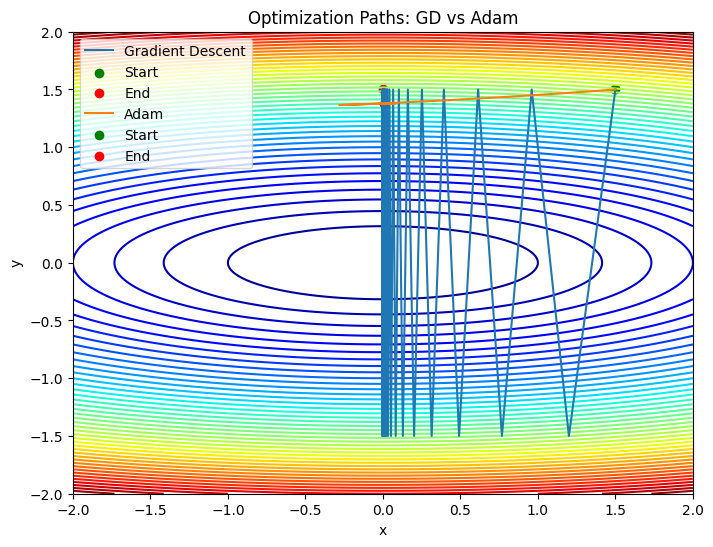

In [22]:
#Plot results
plot_paths(quadratic_loss, [path_gd, path_adam],
 ["Gradient Descent", "Adam"], "Optimization Paths: GD vs Adam")

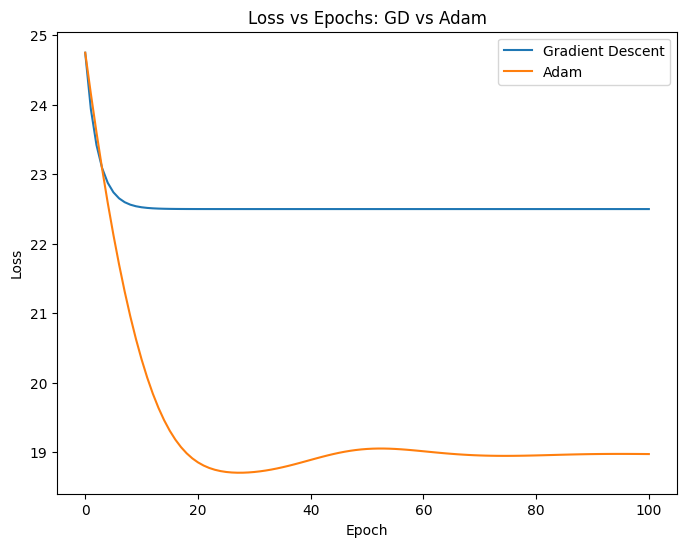

In [23]:
plot_losses(
    [losses_gd, losses_adam],
    ["Gradient Descent", "Adam"],
    "Loss vs Epochs: GD vs Adam"
)